<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2022</h1>
<h2>Problemes 2 - Algorismes sobre grafs</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pylab as plt
import numpy as np
import random

## Recordatori: DFS

In [3]:
def dfs(G, visited, current_node):
    # Versió recursiva del DFS.
    
    # Si el node actual no està visitat, l'afegim
    if current_node not in visited:        
        print(current_node, end=' ')
        visited.add(current_node)

        # Per a cada veí del node actual, cridem de nou a la funció DFS per seguir visitant
        for nei in G.neighbors(current_node):
            dfs(G, visited, nei)        

DFS: 0 1 2 3 4 5 6 7 8 9 

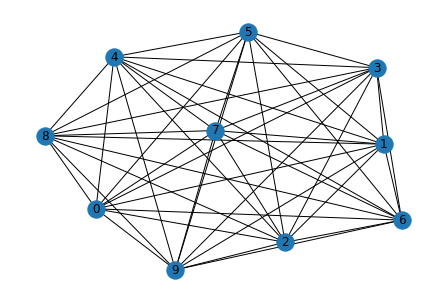

In [4]:
import networkx as nx
G = nx.random_geometric_graph(10, 3)

print('DFS: ',end='')
dfs(G, set(), 0)

nx.draw(G, with_labels=True)

## Component connexa

Sigui $G$ un graf, una __component connexa__ és un subgraf $S\subset G$ tal que, per a dos nodes qualsevols de $S$, existeix un camí dins de $S$ que els connecta i per a qualsevol parella de nodes de $G$ on $n_1\in S$, $n_2\notin S$, no existeix un camí entre $n_1$ i $n_2$.

Observeu l'exemple següent. Aquest graf té tres compoenents connexes:

<img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Pseudoforest.svg" alt="image info" style="width:20%"/>

<div class="alert alert-success">
<h1>Problema 1</h1>
<p>
    Donat un graf, escriu un algorisme que retorni el nombre de components connexes que conté i una llista de llistes amb tots els nodes de cada component connexa
</p>    
    
</div>

In [5]:
# Implementació del DFS. Funció auxiliar per a resoldre el problema de les components connexes.
# En aquest cas, passarem una llista extra 'cc' que conté els nodes visitats dins de la component actual
# En canvi, 'visited' contindrà tots els nodes visitats fins el moment (és a dir, de totes les components connexes)
def aux_dfs(G, node, visited, cc):
    if node not in visited:
        visited.add(node)
        cc.append(node)
        for nei in G.neighbors(node):
            # Crida recursiva
            visited, cc = aux_dfs(G, nei, visited, cc)
    return visited, cc

def connected_components(G):
    # Per practicar amb llistes i conjunts, podem definir 'visited' com a conjunt (set()) i 
    # la llista de components connexes com a llista ([]).
    visited = set()    # Conté tots els nodes visitats fins al moment
    connected_lst = [] # Contindrà les components connexes (llista de llistes)
    for n in G.nodes():
        if n not in visited:
            cc = [] # Inicialitzem la component connexa i visitem tots els seus nodes
            visited, cc = aux_dfs(G, n, visited, cc)
            connected_lst.append(cc)
        
    return len(connected_lst), connected_lst

(3, [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12, 13, 14]])


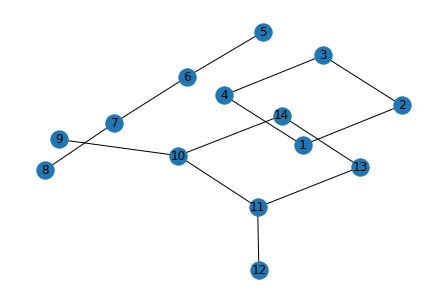

In [8]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,1),(5,6),(6,7),(7,8),(9,10),(10,11),(11,12),(11,13),(13,14),(14,10)])
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True)

print(connected_components(G))

## Grafs bipartits

Diem que un graf és __bipartit__ si podem separar els seus nodes en dos grups de manera que els nodes del primer grup només tinguin arestes cap a nodes del segon grup (i viceversa). És a dir, que no existeixin arestes que connectin nodes d'un mateix grup: 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/Simple-bipartite-graph.svg" alt="bipartite graph" style="width: 25%" />

Networkx ens permet generar grafs bipartits aleatoris utilitzant la funció `random_graph()` del mòdul _bipartite_. Aquesta funció rep tres paràmetres $n, m, p$ on:
- $n$ és el nombre de nodes del primer grup.
- $m$ és el nombre de nodes del segon grup.
- $p$ és la probabilitat de creació d'arestes (0 per no crear-ne cap i 1 per crear-les totes).

La visualització següent mostra el mateix graf usant dos _layouts_ diferents. La primera figura mostra el layout per defecte on no és fàcil veure si el graf és bipartit o no. En el segon, podem veure clarament els dos grups i com les arestes no connecten nodes d'un mateix grup.

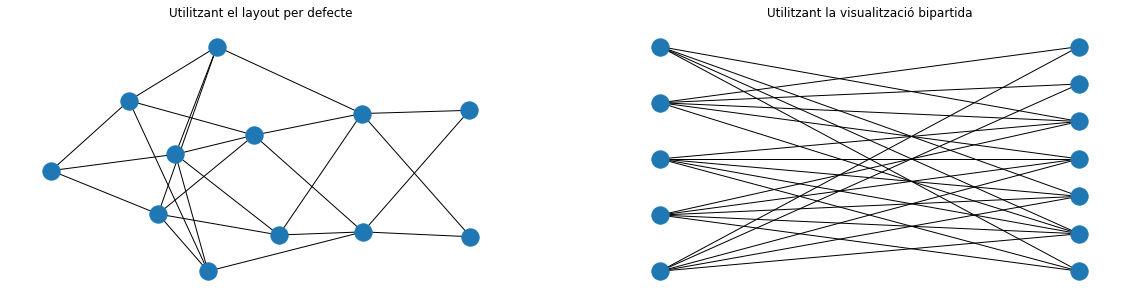

In [9]:
# Generem un graf bipartit connectat (tots els nodes tenen com a mínim una aresta associada)
G = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G = nx.algorithms.bipartite.random_graph(5,7,0.6)

top = nx.bipartite.sets(G)[0]
posbi = nx.bipartite_layout(G, top)

# Mostrem el mateix graf de dues formes diferents
fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].set_title('Utilitzant el layout per defecte')
nx.draw(G, ax=axs[0])

axs[1].set_title('Utilitzant la visualització bipartida')
nx.draw(G, pos=posbi, ax=axs[1])

<div class="alert alert-success">
<h1>Problema 2</h1>
<p>
    Implementeu un algorisme per a determinar si un graf és bipartit. Assumirem que el graf està connectat (entre dos nodes qualsevols sempre existeix un camí) i és NO dirigit.
    <ul>
        <li>Podeu utilitzar el diccionari intern de cada node per a guardar-hi informació: <br>$G.nodes[idx][clau]$ on $idx$ és l'index del node i $clau$ és qualsevol paraula que identifica l'atribut del node.
        <li>Podeu usar la funcio 'neighbors' per a retornar els veïns d'un node
        <li>Per a que sigui més senzill, definiu una funció auxiliar que es basi en el DFS per a fer la cerca.
    </ul>
</p>    
    
<p>

</p>
    
</div>

In [10]:
# Generem un graf bipartit
# En aquest problema, ens assegurem que el graf generat no tingui nodes aïllats
G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G_bi):
    G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)

# Al crear un graf bipartit, es crea un atribut anomenat 'bipartite' que pren valors 0 i 1. Els eliminem ja que no els usarem en la nostra solució
for n in G_bi.nodes():
    del G_bi.nodes[n]['bipartite']

In [11]:
# Generem un graf NO bipartit
G_geo = nx.random_geometric_graph(10, 3)

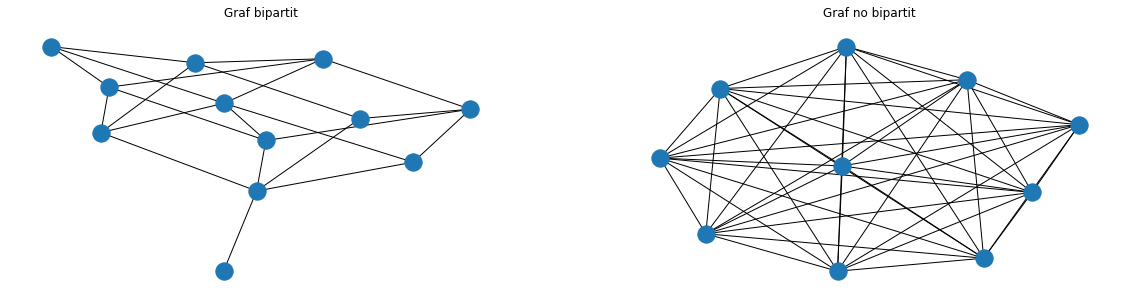

In [12]:
# Mostrem els grafs que hem creat
fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].set_title('Graf bipartit')
nx.draw(G_bi, ax=axs[0])

axs[1].set_title('Graf no bipartit')
nx.draw(G_geo, ax=axs[1])

<div class="alert alert-warning">
Un graf és bipartit si, com hem vist a la introducció, el podem pintar de dos colors. És a dir, si estem utilitzant BLAU i VERMELL, sempre que pintem un node de color BLAU, hem de comprovar que tots els seus veïns són VERMELLS, i viceversa.
</div>

In [13]:
# VERSIÓ 1 (No òptima)
# Pas 1: Pintem tots els nodes del graf mentre aquests no estiguin visitats
# Pas 2: Comprovem que se satisfà la condició de bipartit, és a dir, que tots els veïns d'un node estan pintat d'un color diferent.

# Per fer-ho usarem, en comptes de colors, un atribut del node al que hem anomenat 'grup' i que pot prendre valor -1 i 1.

# Funció DFS auxiliar, molt similar a la del primer exercici. Passem com a paràmetre el grup que toca assignar al node
def dfs_paint(G, n, grup):
    
    # Si no ten un grup assignat, li assignem
    if 'grup' not in G.nodes[n]:
        G.nodes[n]['grup']=grup    
        
        # Visitem tots els veïns d'un node, assignant el grup contrari: grup*(-1) per anar alternant -1 i 1
        for nei in G.neighbors(n):            
            dfs_paint(G, nei, grup*-1)

def es_bipartit(G):
    # Agafem un node qualsevol, en aquest cas estem triant el primer de la llista
    n = list(G_bi.nodes())[0]    
    
    # Apliquem DFS per assignar els grups, començant per assignar-li el grup 1 al primer node
    dfs_paint(G,n,1)
    
    # Comprovem si l'assignació satisfà la definició de bipartit.
    # Tots els veïns d'un node han de tenir un grup assignat diferent a el seu.
    for v in G.nodes():
        for nei in G.neighbors(v):
            if G.nodes[v]['grup']==G.nodes[nei]['grup']:                
                # Retornem False si dos veïns no satisfan la condició.
                return False
    
    # Retornem True si tots els veïns satisfan la condició.
    return True

In [14]:
# VERSIÓ 2
# Funció DFS auxiliar, molt similar a la del primer exercici. Passem com a paràmetre el grup que toca assignar al node.
# Farem el mateix que en la solució anterior amb una millora. Parem l'execució si trobem una contradicció.

def dfs_paint_v2(G, n, grup):
    
    # Comprovem si ja hem visitat el node actual n, igual que abans
    # Li assignem un grup en cas que no ho haguem fet encara
    if 'grup' not in G.nodes[n]:
        G.nodes[n]['grup']=grup          
        
        # Per cada veí del node, si ja està pintat, comprovem si son o no del mateix color. 
        # Si ho son, ja hem acabat i l'algorisme ha de retornar False
        for nei in G.neighbors(n):     
            if 'grup' in G.nodes[nei]: # Comprovem si el veí està visitat
                if G.nodes[nei]['grup']==G.nodes[n]['grup']: # Comprovem si són del mateix color
                    return False
                           
            # Si el veí no està visitat, l'explorem.
            # Observeu que al cridar aquesta funció estem comprovant si retornarà False. 
            # En cas que sigui així, hem d'acabar l'execució
            else:
                if not dfs_paint_v2(G, nei, grup*-1): # És a dir 
                    return False
                
    return True

def es_bipartit_v2(G):
    # Agafem un node qualsevol, en aquest cas estem triant el primer de la llista
    n = list(G.nodes())[-1]    
   
    # Apliquem DFS per assignar els grups, començant per assignar-li el grup 1 al primer node
    return dfs_paint_v2(G,n,1)

In [15]:
print(es_bipartit(G_bi.copy()))
print(es_bipartit(G_geo.copy()))

True
False


In [16]:
print(es_bipartit_v2(G_bi.copy()))
print(es_bipartit_v2(G_geo.copy()))

True
False


<div class="alert alert-warning">
Observeu el temps d'execució de les dues versions de l'algorisme del segon exercici. Podeu veure com una implementació és més ràpida que l'altre.
</div>

In [17]:
%%timeit
es_bipartit(G_bi.copy())
es_bipartit(G_geo.copy())

276 µs ± 2.82 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
%%timeit
es_bipartit_v2(G_bi.copy())
es_bipartit_v2(G_geo.copy())

207 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
